In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### <center>Problema do Aprendizado utilizando Perceptron<center>
### <align=right>Tibor Zequini Boglár</align>

Dado um problema de aprendizado, nosso objetivo é encontrar uma função $g:X\rightarrow Y$ que se aproxime da função $f:X\rightarrow Y$, onde $f$ se trata da função exata de nosso problema. 

O problema estará resolvido se $g \approx f$.

Tomamos $X$ como o conjunto dos Inputs e $Y$ é o conjunto dos Outputs.

Para chegarmos na função $g$ usamos uma função linear chamada hipótese $h$ que nos auxilia no aprendizado, onde $h \in \mathbb{H}$, tal que $\mathbb{H}$ é o conjunto das funções hipóteses.

Supondo o problema de aprovação de crédito, onde

$$\vec{x}=(x_1, x_2, ..., x_d) \qquad \text{x$_i$ é um atributo do cliente}$$

$$y \in \{1,-1\} \qquad \text{se y=1} \implies \text{aprovado, se y= -1} \implies \text{reprovado}  $$

Queremos saber se aprovamos seu crédito, para isso tomamos

$$\text{Aprovado se } \sum_{i=1}^{d}w_ix_i \geq \text{threshold}$$ 

$$\text{Reprovado se } \sum_{i=1}^{d}w_ix_i < \text{threshold}$$ 


Tomando $w_0 = $ threshold e chamando $x_0 = 1$, podemos escrever

$$h(\vec{x_n}) = \text{sinal}\left( \sum_{i=0}^{d} w_ix_i \right)=\text{sinal}(\vec{w}\cdot\vec{x_n})=\textbf{w}^\textbf{T}\textbf{x$_n$}$$

### <center> Aprendizado <center>

Supondo que temos $n$ dados em mãos, do tipo

$$(\vec{x_1}, y_1), (\vec{x_2}, y_2), ..., (\vec{x_n}, y_n)$$

Supondo que $y_n=1$ mas tivemos que $h(\vec{x_n})=-1$, então precisamos fazer a correção, para isso, atualizamos nosso peso $\vec{w}$, fazendo 

$$\vec{w} := \vec{w} + y_n \vec{x_n}$$

In [4]:
# Função que gera dois pontos aleatórios: (x1, y1), (x2,y2) 
# Gera-se a reta dada pela equação y = ax + b
# Retorna os coeficientes a, b
def random_line():
    x = np.random.uniform(-1, 1, 2)
    y = np.random.uniform(-1, 1, 2)
    a = (y[1] - y[0])/(x[1] - x[0])
    b = y[0]
    return a, b

a, b  = (random_line()[0], random_line()[1])

In [5]:
a,b

(0.11227335732038531, -0.60701798052505551)

A função da reta é dada por f(x) = 0.11227335732x + -0.607017980525


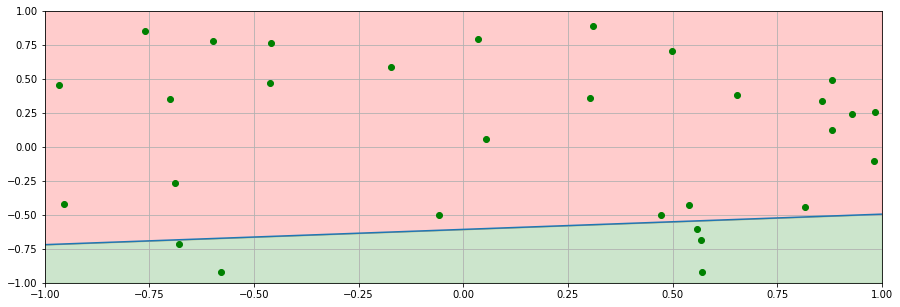

In [7]:
# Criando os dados que desenharão o plano e a reta
x = [-1,1]
y = [a*x[0] + b, a*x[1] + b]

# Criando o plano com a reta, separando os valores que serão mapeados para +1 ou -1
plt.figure(figsize=(15,5))
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.grid()
plt.plot(x, y)

# Criando as listas x0, x1, x2 de tamanho n, onde n é o número de pontos a serem plotados.
# Um input x, isto é, um vetor x será dado por x = [x0, x1, x2]
n = 30
x0 = [1 for i in range (0, n)]
x1, x2 = (np.random.uniform(-1, 1, n), np.random.uniform(-1, 1, n))
plt.plot(x1, x2, 'go')
store1, store2 = (x1,x2)

# Colorindo as áreas fora da linha
plt.fill_between(x, [1,1], y, color='r',alpha=.2)
plt.fill_between(x, [-1,-1], y, color='g',alpha=.2)

print('A função da reta é dada por f(x) = ' + str(a) + 'x + ' + str(b))
plt.show()

### Meu objetivo é encontrar uma função h(x) que irá se aproximar da função f(x)


In [8]:
# Inicializando o vetor w = [w0, w1, w2] como w = [0, 0, 0]
weights = np.zeros(3)

# Função hipótese, retornará 1 ou -1
def h(w, x):
    res = 0
    for i in range (0, len(x)):
        res = res + w[i]*x[i]
    return np.sign(res)

In [10]:
# Essa função irá receber x = [x0 x1 x2], onde x0 = 1 e (x1,x2) são pontos do plano.
# Se estiver na área azul => devolve 1
# Se estiver na área vermelha => devolve -1
def y (x, a, b):
    val = 0
    if x[2] > a*x[1] + b:
        val = 1
    else:
        val = -1
    return val

In [11]:
# Percepetron rodando 100 vezes
it = 1000
for j in range (0, it):
    for i in range (0, n):
        x = [x0[i], x1[i], x2[i]]
        if (h(weights, x) != y(x, a, b)):
            weights += np.multiply(y(x,a,b), x)

In [12]:
# Se a função hipótese retornar 1, então ela discriminou o ponto como vermelho, do contrário, discriminou como azul.
def classifier(val):
    w = ''
    if (val == -1):
        w = 'Azul'
    else:
        w = 'Vermelho'
    return w

In [13]:
# Testando meu perceptron
#-- Dado os pontos x_i tal que x1 = (x_a, x_b)
x1 = [1, 0.5, -0.9]
x2 = [1, -0.25, 0.5]
x3 = [1, -.8, .7]
x4 = [1, .8, -.3]
x5 = [1, -.8, -.4]
x6 = [1, .8, .47]
print('Ponto:', (x1[1], x1[2]), classifier(h(weights, x1)))
print('Ponto:', (x2[1], x2[2]), classifier(h(weights, x2)))
print('Ponto:', (x3[1], x3[2]), classifier(h(weights, x3)))
print('Ponto:', (x4[1], x4[2]), classifier(h(weights, x4)))
print('Ponto:', (x5[1], x5[2]), classifier(h(weights, x5)))

Ponto: (0.5, -0.9) Azul
Ponto: (-0.25, 0.5) Vermelho
Ponto: (-0.8, 0.7) Vermelho
Ponto: (0.8, -0.3) Vermelho
Ponto: (-0.8, -0.4) Vermelho


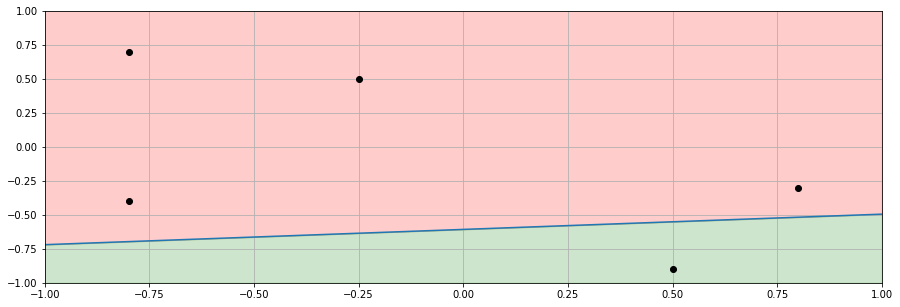

In [16]:
# Plota a mesma coisa que o gráfico de cima
x = [-1,1]
y = [a*x[0] + b, a*x[1] + b]
plt.figure(figsize=(15,5))
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.grid()
plt.plot(x, y)
plt.fill_between(x, [1,1], y, color='r',alpha=.2)
plt.fill_between(x, [-1,-1], y, color='g',alpha=.2)

# Plota os pontos que eu criei para testar para verificar no olho se o perceptron acerta ou erra
plt.plot([x1[1], x2[1], x3[1], x4[1], x5[1]], 
         [x1[2], x2[2], x3[2], x4[2], x5[2]], 
         'ko')

plt.show()

Dava para automatizar os processos de verificação do perceptron e colocar uma métrica hit-or-miss? Dava, aber es ist das leben, oder, c'est la vie.